首先，我们载入一些类的定义：

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.datasets import make_moons, make_circles, make_classification
%matplotlib inline

接着，我们生成一些随机数据，并加入了一些噪音。生成数据的同时把数据归一化：

In [5]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

对数据做一次可视化：

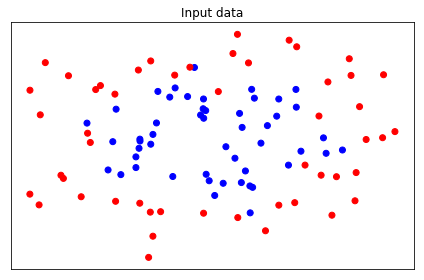

In [6]:
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot()
ax.set_title("Input data")

# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
ax.set_xticks(())
ax.set_yticks(())
plt.tight_layout()
plt.show()

现在我们对这个数据集进行SVM RBF分类，分类时使用了网格搜索，在C=(0.1, 1, 10)和gamma=(1, 0.1, 0.01)形成的9种情况中选择最好的超参数，我们用了4折交叉验证。这里只是一个例子，实际运用中，你可能需要更多的参数组合来进行调参。

In [7]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid={"C":[0.1, 1, 10], "gamma":[1, 0.1, 0.01]}, cv=4)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 0.1} with a score of 0.91


也就是说，通过网格搜索，在我们给定的9组超参数中，C=10，gamma=0.1分数最高，这就是我们最终的参数候选。

到这里我们的调参举例就结束了。不过我们可以看看我们的普通SVM分类后的可视化。这里我们把这9种组合各个训练后通过对网格里的点预测来标色，观察分类的效果图。代码如下：

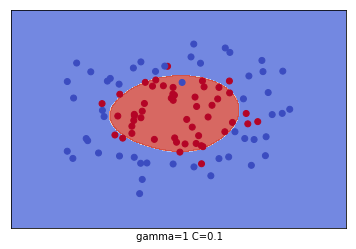

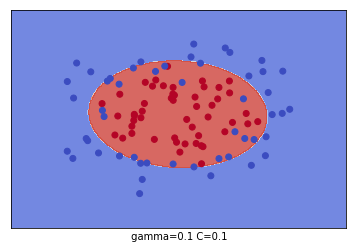

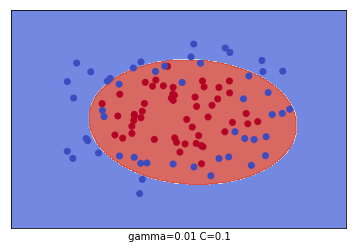

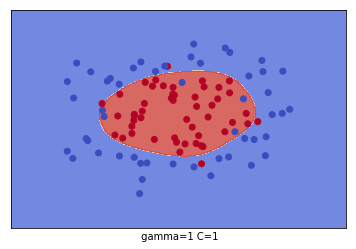

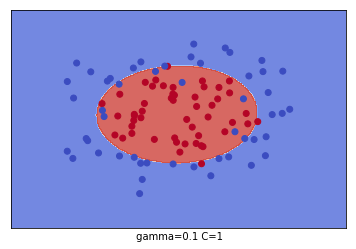

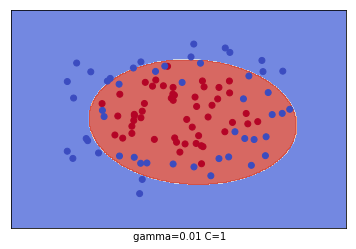

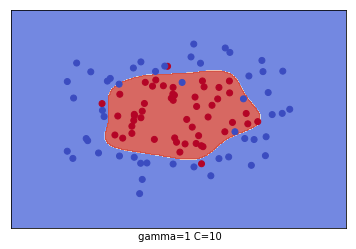

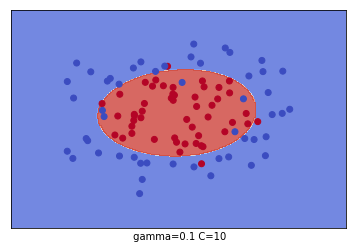

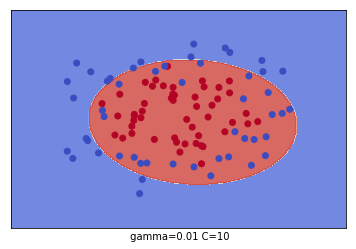

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

for i, C in enumerate((0.1, 1, 10)):
    for j, gamma in enumerate((1, 0.1, 0.01)):
        plt.subplot()
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        
        # plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(" gamma=" + str(gamma) + " C=" + str(C))
        plt.show()

以上就是SVM RBF调参的一些总结。